## AI5003 - Advance Machine Learning - Assignment No. 1 - Problem 02 - (Classification)
## Name: **Muhammad Azhar**
## ID: **24K-7606**
## Submitted to: **Professor Dr. Muhammad Rafi**

Setup and data loading

In [2]:
# Install required packages
!pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.5/393.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 13.2 MB/s eta 0:00:00


In [61]:
# Import necessary libraries
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
# Load the dataset
df = pd.read_csv('dataset for A1P2 drug200.csv')

In [63]:
# Generate a profile report for detailed data exploration
profile = ProfileReport(df)
profile.to_file(output_file="startup-data-analytics.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data exploration and preprocessing

In [64]:
df.head() # Display first few rows of the dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [65]:
df.info() # Check data information (data types, non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [66]:
df.isnull().sum() # Check for missing values

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [67]:
# Check unique values in categorical columns
print("Unique values in categorical columns:")
print("Sex categories:", df['Sex'].unique())
print("Blood Pressure categories:", df['BP'].unique())
print("Cholesterol categories:", df['Cholesterol'].unique())
print("Drug categories:", df['Drug'].unique())

Unique values in categorical columns:
Sex categories: ['F' 'M']
Blood Pressure categories: ['HIGH' 'LOW' 'NORMAL']
Cholesterol categories: ['HIGH' 'NORMAL']
Drug categories: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


Exploratory Data Analysis (EDA)

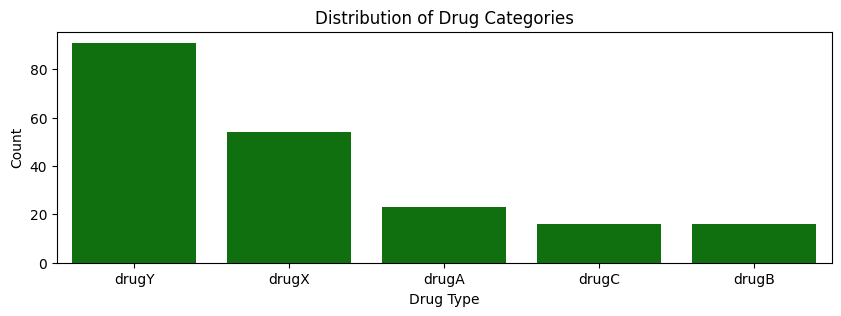

In [68]:
# Visualize the distribution of the target variable (Drug)
plt.figure(figsize=(10, 3))
drug_counts = df['Drug'].value_counts()
sns.barplot(x=drug_counts.index, y=drug_counts.values,color='green')
plt.title("Distribution of Drug Categories")
plt.xlabel("Drug Type")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Frequency')

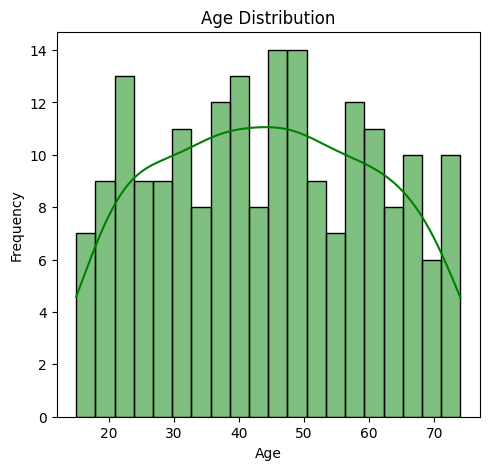

In [69]:
# Visualize age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], bins=20, kde=True,color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

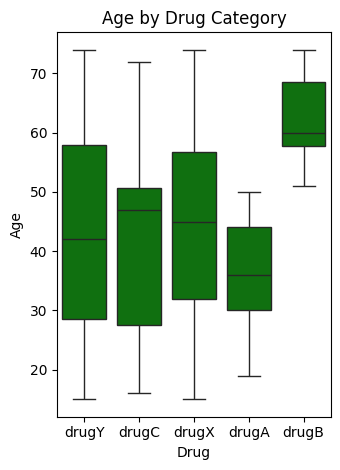

In [70]:
plt.subplot(1, 2, 2)
sns.boxplot(x="Drug", y="Age", data=df,color='green')
plt.title("Age by Drug Category")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

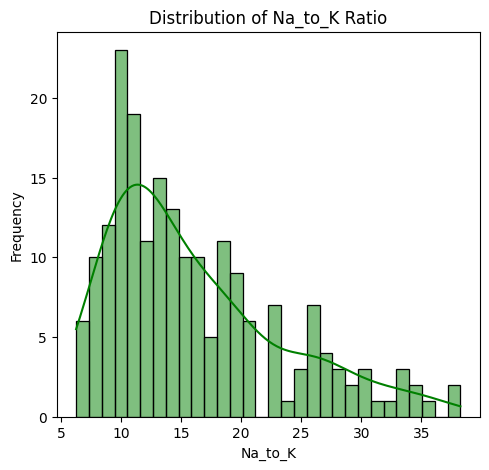

In [71]:
# Visualize Na_to_K distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Na_to_K'], bins=30, kde=True,color='green')
plt.title("Distribution of Na_to_K Ratio")
plt.xlabel("Na_to_K")
plt.ylabel("Frequency")

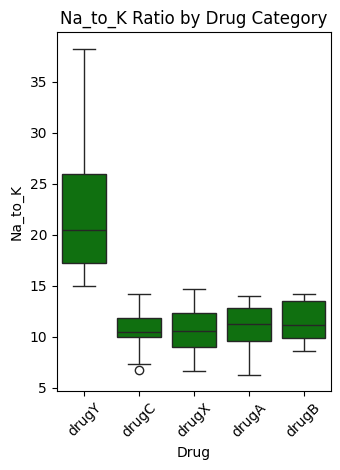

In [72]:
plt.subplot(1, 2, 2)
sns.boxplot(x="Drug", y="Na_to_K", data=df,color='green')
plt.title("Na_to_K Ratio by Drug Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
df['Na_to_K'].describe()

,Na_to_K
count,200.000000
mean,16.084485
std,7.223956
min,6.269000
25%,10.445500
50%,13.936500
75%,19.380000
max,38.247000


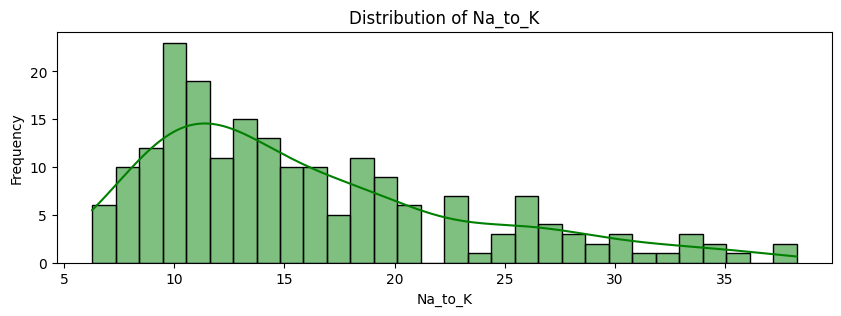

In [74]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Na_to_K'], bins=30, kde=True,color='green')
plt.xlabel("Na_to_K")
plt.ylabel("Frequency")
plt.title("Distribution of Na_to_K")
plt.show()

Relationship between categorical variables and drug category

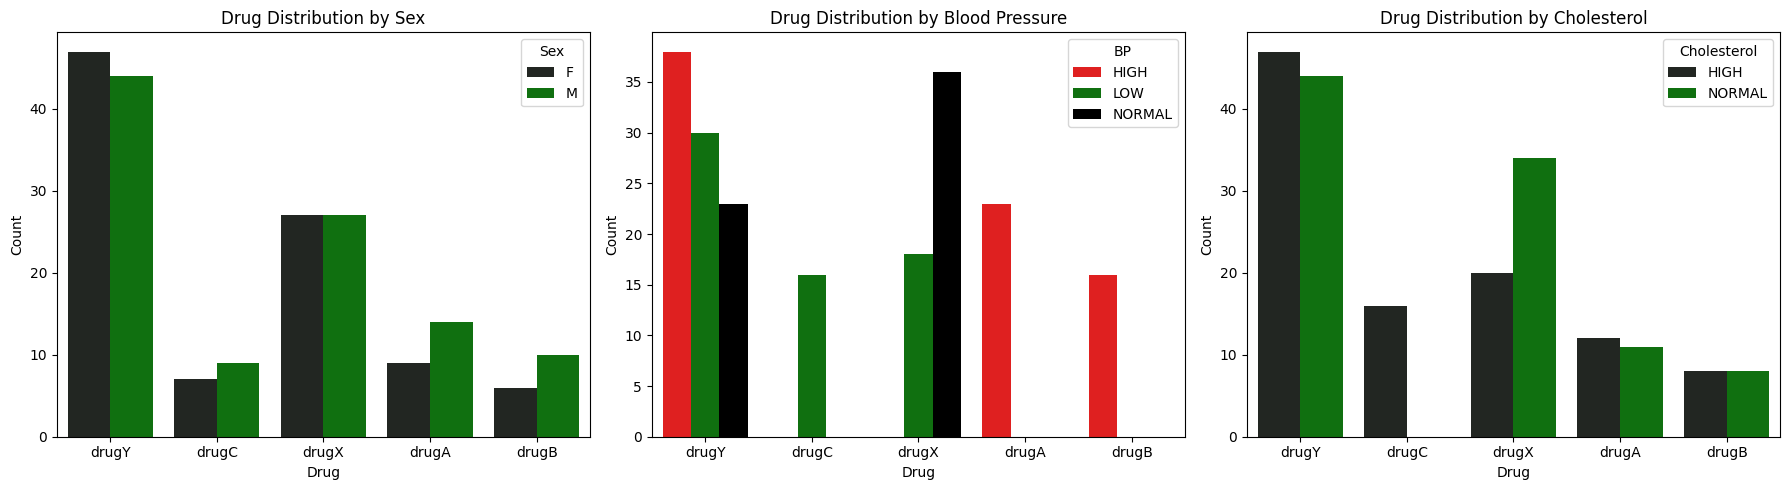

In [75]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Drug', hue='Sex', data=df,palette='dark:green')
plt.title("Drug Distribution by Sex")
plt.xlabel("Drug")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
custom_palette = ["red", "green", "black"]
sns.countplot(x='Drug', hue='BP', data=df,palette=custom_palette)
plt.title("Drug Distribution by Blood Pressure")
plt.xlabel("Drug")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.countplot(x='Drug', hue='Cholesterol', data=df,palette='dark:green')
plt.title("Drug Distribution by Cholesterol")
plt.xlabel("Drug")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [76]:
df.describe(include='all') # Statistical summary of the dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


Data Preprocessing

In [77]:
df = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True) # Encode categorical variables using one-hot encoding

In [78]:
drug_mapping = {
    'drugY': 0,
    'drugC': 1,
    'drugX': 2,
    'drugA': 3,
    'drugB': 4
}
df['Drug_encoded'] = df['Drug'].map(drug_mapping)
# Map drug categories to numerical values

In [79]:
# Prepare features and target variable
x = df.drop(['Drug', 'Drug_encoded'], axis=1)
y = df['Drug_encoded']

In [80]:
# Normalize numerical features (Age and Na_to_K)
scaler = StandardScaler()
x[['Age', 'Na_to_K']] = scaler.fit_transform(x[['Age', 'Na_to_K']])

In [81]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.20 , random_state = 1)

In [82]:
print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 160 samples
Testing set size: 40 samples


Decision Tree Model

In [83]:
# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [84]:
dt_y_pred = dt_classifier.predict(x_test) # Make predictions

In [85]:
print("Accuracy:", metrics.accuracy_score(y_test, dt_y_pred))

Accuracy: 0.85


In [86]:
print("\nClassification Report:")
print(classification_report(y_test, dt_y_pred,
                           target_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
                           zero_division=0))


Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00        17
       drugC       0.00      0.00      0.00         4
       drugX       0.76      1.00      0.87        13
       drugA       0.67      1.00      0.80         4
       drugB       0.00      0.00      0.00         2

    accuracy                           0.85        40
   macro avg       0.49      0.60      0.53        40
weighted avg       0.74      0.85      0.79        40




Confusion Matrix:


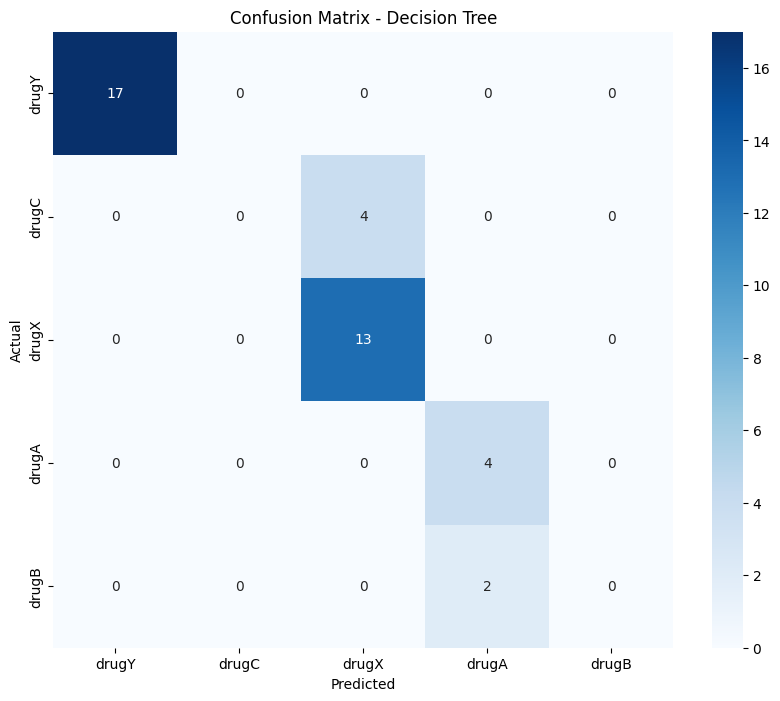

In [87]:
#prompt create confusion metrics for secision tree
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
            yticklabels=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [88]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_classifier, x, y, cv=5)
print(f"\nCross-Validation Scores (5-fold): {dt_cv_scores}")
print(f"Average CV Score: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")


Cross-Validation Scores (5-fold): [0.85  0.825 0.85  0.8   0.825]
Average CV Score: 0.8300 ± 0.0187


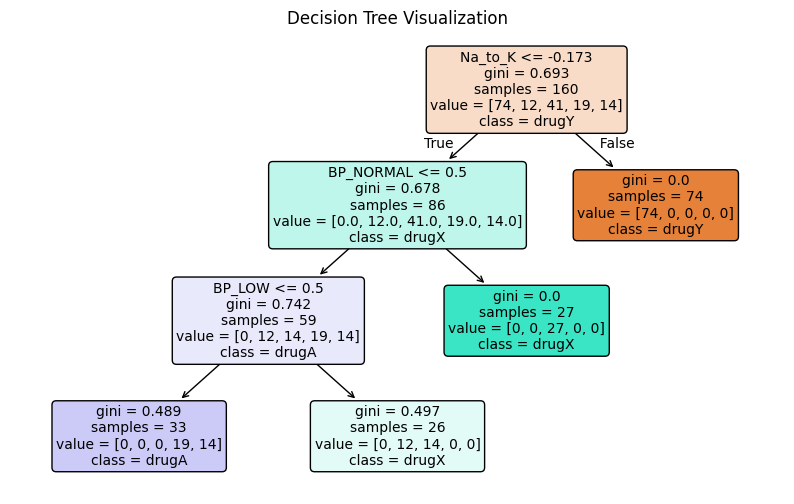

In [89]:
# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(dt_classifier,
               feature_names=x.columns,
               class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
               filled=True,
               rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

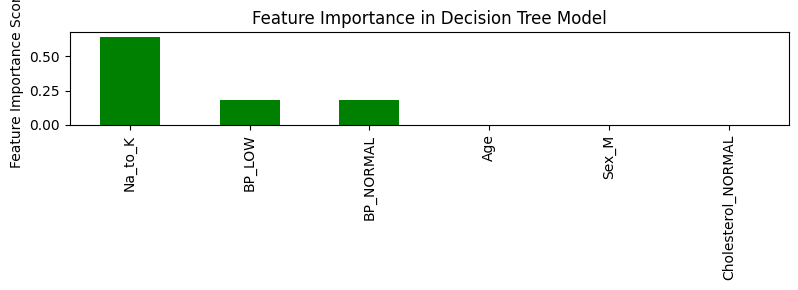

In [92]:
# Feature importance for Decision Tree
dt_feature_imp = pd.Series(dt_classifier.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 3))
dt_feature_imp.plot.bar(color='green')
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()

Random Forest Model

In [93]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [94]:
# Make predictions
rf_y_pred = rf_classifier.predict(x_test)

In [95]:
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

Accuracy: 1.0


In [96]:
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred,
                           target_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB']))


Classification Report:
              precision    recall  f1-score   support

       drugY       1.00      1.00      1.00        17
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40




Confusion Matrix:


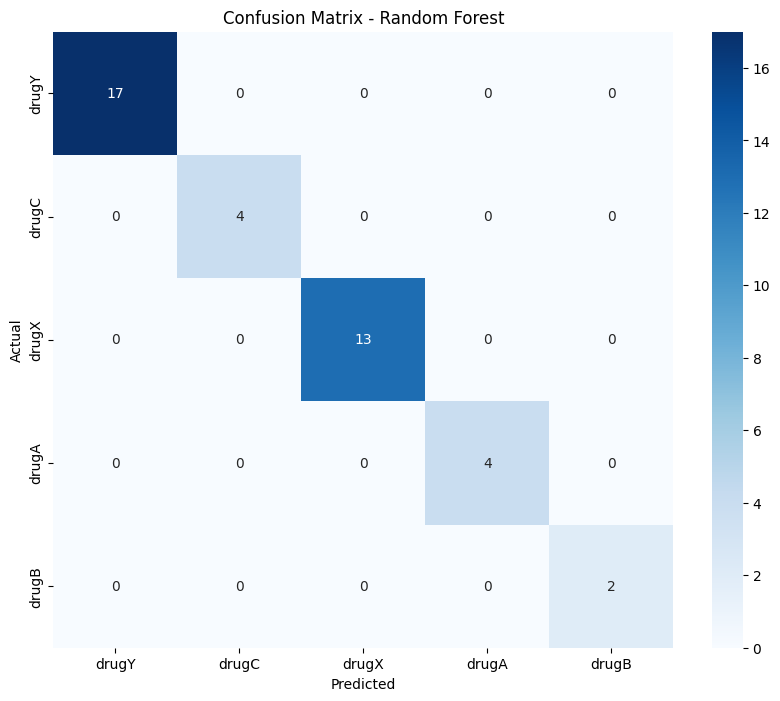

In [97]:
# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
            yticklabels=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [98]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, x, y, cv=5)
print(f"\nCross-Validation Scores (5-fold): {rf_cv_scores}")
print(f"Average CV Score: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Cross-Validation Scores (5-fold): [1.    1.    1.    0.9   0.975]
Average CV Score: 0.9750 ± 0.0387


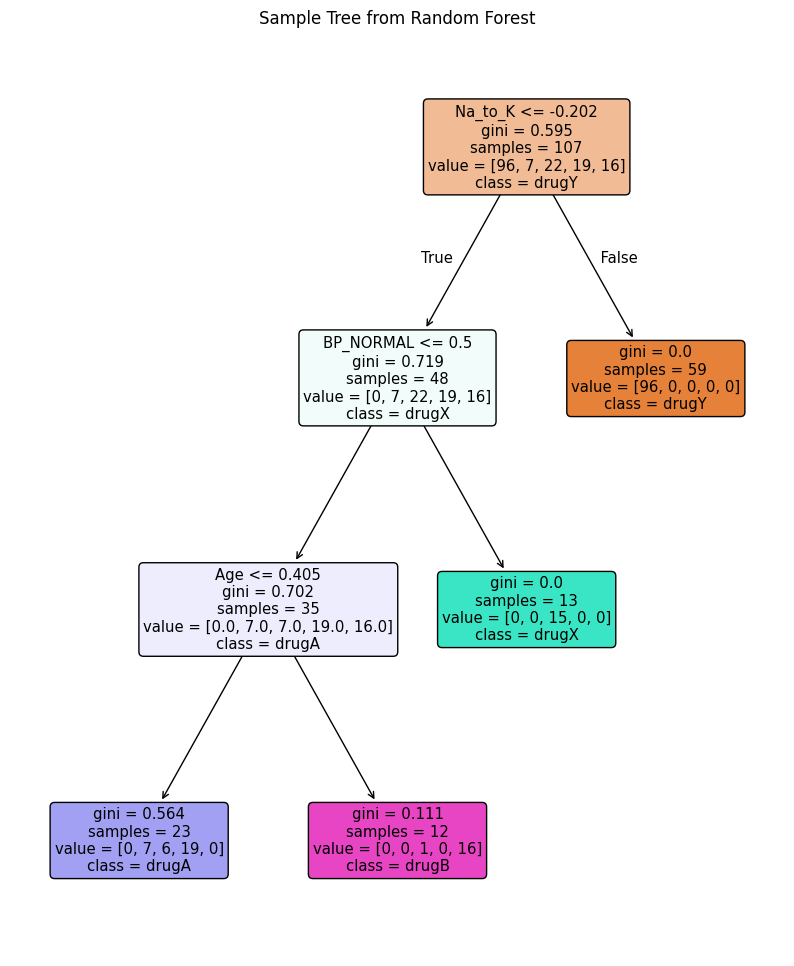

In [99]:
#Prompt : Plot the Random Forest
# Access the first tree in the forest (adjust index if needed)
plt.figure(figsize=(10, 12))
tree.plot_tree(rf_classifier.estimators_[0],
               feature_names=x.columns,
               class_names=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],
               filled=True,
               rounded=True)
plt.title("Sample Tree from Random Forest")
plt.show()

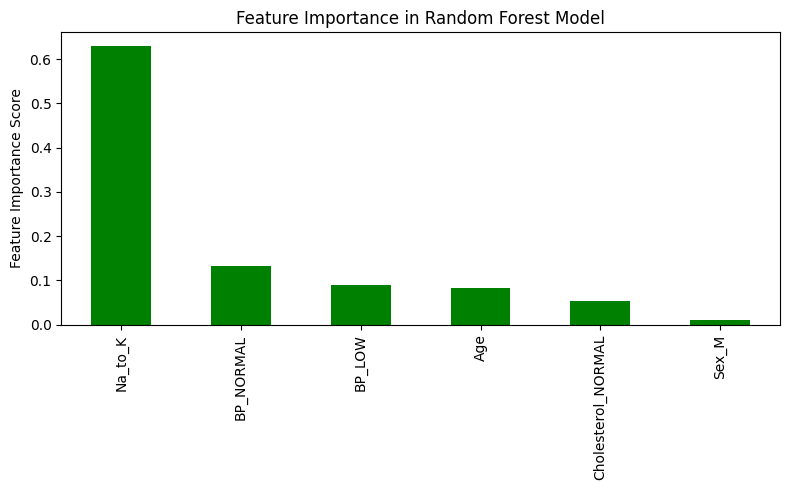

In [100]:
# Feature importance for Random Forest
rf_feature_imp = pd.Series(rf_classifier.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
rf_feature_imp.plot.bar(color='green')
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()

Model Comparison And Conclusions

In [101]:
models = ['Decision Tree', 'Random Forest']
accuracies = [metrics.accuracy_score(y_test, dt_y_pred), metrics.accuracy_score(y_test, rf_y_pred)]
cv_scores = [dt_cv_scores.mean(), rf_cv_scores.mean()]

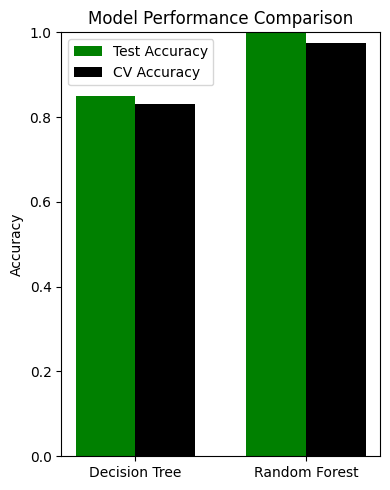

In [102]:
plt.figure(figsize=(4, 5))
bar_width = 0.35
x = np.arange(len(models))
plt.bar(x - bar_width/2, accuracies, bar_width, label='Test Accuracy',color='green')
plt.bar(x + bar_width/2, cv_scores, bar_width, label='CV Accuracy',color='black')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

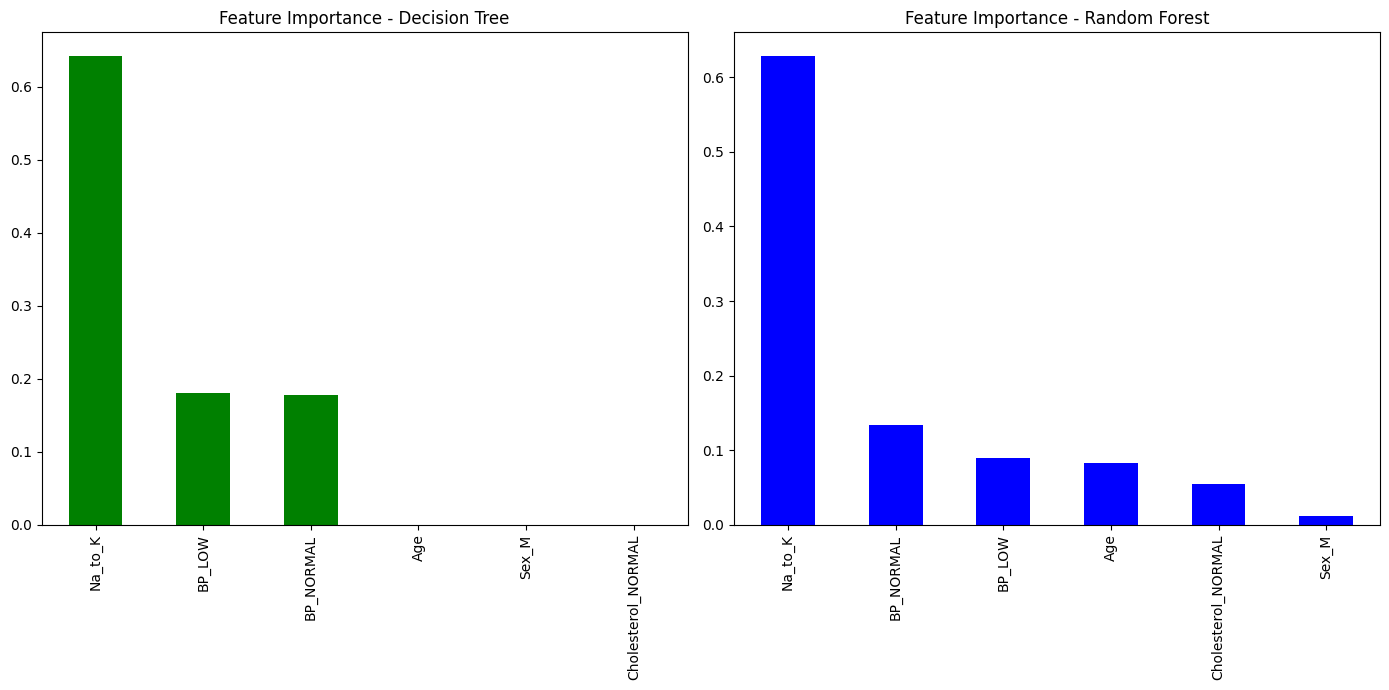

In [105]:
# Compare feature importance between models
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
dt_feature_imp.plot.bar(color='green')
plt.title('Feature Importance - Decision Tree')
plt.tight_layout()

plt.subplot(1, 2, 2)
rf_feature_imp.plot.bar(color='blue')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()

plt.show()

In [77]:
#Prompt help me write report on influential features , comparing both , insights

# Model Comparison and Analysis

## Comparing Models: Decision Tree vs Random Forest

**Random Forest outperforms the Decision Tree model**:

1. **Accuracy**:
   - Decision Tree: 85%
   - Random Forest: 100%

2. **Class-specific Performance**:
   - Decision Tree struggles with minority classes (drugC and drugB have 0% precision and recall)
   - Random Forest perfectly classifies all drug categories, even minority classes

3. **Consistency**:
   - Decision Tree CV score: 0.83 ± 0.019
   - Random Forest CV score: 0.975 ± 0.039
   
4. **Error Analysis**:
   - Decision Tree confusion matrix shows all drugC samples were misclassified as drugX, and all drugB samples were misclassified as drugA
   - Random Forest correctly classified all samples across all categories

## Most Influential Features

1. **Na_to_K ratio** is by far the most important feature for both models:
   - Decision Tree: 64.3% importance
   - Random Forest: 62.9% importance
   
2. **Blood Pressure** is the second most important feature:
   - Combined importance (BP_LOW + BP_NORMAL) in Decision Tree: ~35.7%
   - Combined importance in Random Forest: ~22.3%
   
## Challenges Encountered and Solutions

1. **Class Imbalance**:
   - Challenge: The dataset has uneven distribution across drug categories (17 samples of drugY vs only 2 samples of drugB)
   - Solution: Random Forest naturally handled this imbalance better through its ensemble approach and bootstrapping

## Recommendations for Model Improvement
   
1. **Handling Class Imbalance**:
   - Apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for minority classes
   
2. **Additional Data Collection**:
   - More samples for underrepresented classes (drugB, drugC) would improve model robustness
   
6. **Feature Expansion**:
   - Collect additional health markers that might have predictive power for drug classification

In conclusion, while both models provide valuable insights, Random Forest demonstrates superior performance for this classification task, particularly in handling minority classes and utilizing the full range of available features.

